In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load the dataset as a pandas data frame 
df01 = pd.read_csv('Solubility_ESOL.csv')

# to remove the unnecessary columns 
df02 = df01.drop(['N','Compound ID', 'ESOL predicted log(solubility:mol/L)','measured log(solubility:mol/L)',], axis =1)

# To standardize df02
from sklearn.preprocessing import StandardScaler 
df_st = StandardScaler().fit_transform(df02)

# to create a new dataframe(df_feat) with the standardized features 
df_feat = pd.DataFrame(df_st, columns = df02.columns) 
df_feat = df01[['measured log(solubility:mol/L)']].join(df_feat)
df_feat.head()

,measured log(solubility:mol/L),MolLogP,MolWt,NumRotatableBonds,NumHAcceptors,NumHDonors,TPSA,HeavyAtomCount,RingCount,FractionCSP3,NumHeteroatoms
0,-2.18,0.078419,-0.358581,-0.827778,-0.977546,-0.639902,-0.98262,-1.069430,-1.061818,1.487506,0.221643
1,-2.00,-0.038941,-0.694382,-0.827778,-0.977546,-0.639902,-0.98262,-1.215354,-1.061818,1.487506,-0.134981
2,-1.74,0.077562,-0.358581,-0.447007,-0.977546,-0.639902,-0.98262,-1.069430,-1.061818,1.487506,0.221643
3,-1.48,-0.225304,-0.694382,-0.447007,-0.977546,-0.639902,-0.98262,-1.215354,-1.061818,1.487506,-0.134981
4,-3.04,0.251860,-0.168234,-0.447007,-0.977546,-0.639902,-0.98262,-0.777582,-1.061818,1.487506,0.934889


In [9]:
from sklearn.model_selection import train_test_split
X = df_feat.drop(['measured log(solubility:mol/L)'], axis= 1)
y = df_feat[['measured log(solubility:mol/L)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression
model_lr01 = LinearRegression()
model_lr01.fit(X_train, y_train)

LinearRegression()

In [11]:
# to see the model's coefficients
df_model_coef = pd.DataFrame(model_lr01.coef_, columns=[X_train.columns])
df_model_coef = df_model_coef.T
df_model_coef.columns=['Coefficients']
df_model_coef

,Coefficients
MolLogP,-1.432433
MolWt,-0.145202
NumRotatableBonds,-0.324411
NumHAcceptors,0.521437
NumHDonors,-0.153906
TPSA,-0.138337
HeavyAtomCount,0.170715
RingCount,-0.643790
FractionCSP3,-0.001072
NumHeteroatoms,-0.383882


In [12]:
#to see the model's intercept
model_lr01.intercept_

array([-3.0689205])

In [ ]:
#help(LinearRegression)

In [13]:
pred = model_lr01.predict(X_test)
df_res = pd.DataFrame(data = pred, columns=["pred"])
df_res

,pred
0,-1.448411
1,-1.385168
2,-9.675092
3,-3.454074
4,-3.316199
...,...
339,-1.242863
340,-2.344230
341,-3.991048
342,-3.045694


In [14]:
array_y_test = np.array(y_test)
df_res['y_test']=pd.DataFrame(data=array_y_test)
df_res

,pred,y_test
0,-1.448411,-1.99
1,-1.385168,-1.09
2,-9.675092,-6.80
3,-3.454074,-3.54
4,-3.316199,-2.60
...,...,...
339,-1.242863,-1.16
340,-2.344230,-3.00
341,-3.991048,-4.40
342,-3.045694,-1.25


Text(0, 0.5, 'y_test: Measured log(solubility:mol/L)')

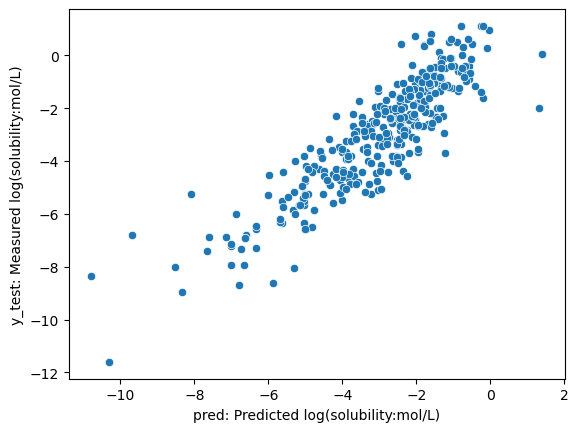

In [15]:
sns.scatterplot(data=df_res, x= 'pred', y='y_test')
plt.xlabel('pred: Predicted log(solubility:mol/L)')
plt.ylabel('y_test: Measured log(solubility:mol/L)')

In [16]:
#to generate the residual data
df_res['residual']= df_res['y_test']- df_res['pred']
df_res

,pred,y_test,residual
0,-1.448411,-1.99,-0.541589
1,-1.385168,-1.09,0.295168
2,-9.675092,-6.80,2.875092
3,-3.454074,-3.54,-0.085926
4,-3.316199,-2.60,0.716199
...,...,...,...
339,-1.242863,-1.16,0.082863
340,-2.344230,-3.00,-0.655770
341,-3.991048,-4.40,-0.408952
342,-3.045694,-1.25,1.795694


<AxesSubplot:xlabel='pred', ylabel='residual'>

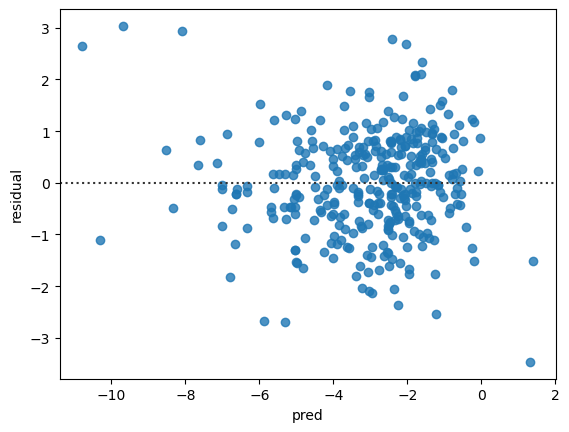

In [17]:
# to generate the residual plot
sns.residplot(data=df_res, x='pred',y='residual')

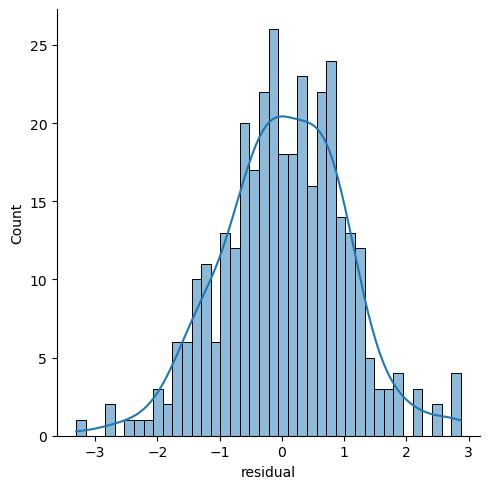

In [18]:
# to visualize the distribution of the residial data  
sns.displot(data= df_res, x='residual',bins=40, kde=True)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,pred)
MSE = mean_squared_error(y_test,pred)
RMSE = np.sqrt(MSE)
print('MAE',"%.4f"% MAE, sep='=')
print('MSE',"%.4f"% MSE, sep='=')
print('RMSE',"%.4f"% RMSE, sep='=')

MAE=0.7819
MSE=0.9795
RMSE=0.9897


## 2.Multiple Linear Regression with Statsmodel 

In [1]:
conda install -c conda-forge statsmodels

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sarah\anaconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.1              |   py39hcbf5309_1         908 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         912 KB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39 

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-22.11.1-py39haa95532~ --> conda-forge::conda-22.11.1-py39hcbf5309_1 




conda-22.11.1        | 908 KB    |            |   0% 

python_abi-3.9       | 4 KB      |            |   0% 

python_

In [23]:
df03 = y_train.join(X_train)
df03 = df03.rename(columns={"measured log(solubility:mol/L)": "measured"})
df03

,measured,MolLogP,MolWt,NumRotatableBonds,NumHAcceptors,NumHDonors,TPSA,HeavyAtomCount,RingCount,FractionCSP3,NumHeteroatoms
992,0.580,-0.993913,-1.428718,-0.447007,-0.515624,-0.639902,-0.504186,-1.361278,-1.061818,0.597915,-0.848227
186,0.450,-0.402476,-0.950281,-0.827778,-0.515624,-0.639902,-0.621342,-0.777582,-0.301668,-0.418761,-0.848227
620,-4.230,0.708276,0.680291,2.599162,1.332063,-0.639902,-0.465228,0.097963,-1.061818,1.487506,0.934889
510,-2.831,-0.361697,-0.341842,-0.827778,-0.053702,0.262747,0.306656,-0.339809,0.458482,-1.181267,0.221643
974,-2.490,-0.292685,-0.657989,-0.447007,-0.053702,-0.639902,0.226497,-0.485734,-0.301668,-0.800014,-0.134981
...,...,...,...,...,...,...,...,...,...,...,...
575,-1.850,0.082601,-0.725325,1.456849,-0.515624,-0.639902,-0.723924,-0.631658,-1.061818,1.487506,-0.848227
973,-0.740,-0.615881,-0.638764,-0.447007,0.408219,0.262747,0.793498,-0.485734,-0.301668,-1.181267,0.221643
75,-2.730,-0.018086,-0.955740,0.314536,-0.977546,-0.639902,-0.982620,-1.069430,-1.061818,1.487506,-0.848227
599,0.523,-0.029023,0.926724,2.218391,1.332063,-0.639902,0.841145,0.681660,-1.061818,0.686874,1.648136


In [24]:
import statsmodels.api as sm
no_consider = df03.columns.difference(['measured'])
model_lr02 = sm.OLS.from_formula( 'measured ~' + '+'.join(no_consider), data=df03)

In [25]:
result2 = model_lr02.fit()
print (result2.summary())

                            OLS Regression Results                            
Dep. Variable:               measured   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     300.2
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          5.01e-261
Time:                        16:10:01   Log-Likelihood:                -1097.0
No. Observations:                 800   AIC:                             2216.
Df Residuals:                     789   BIC:                             2268.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0689      0.03

In [26]:
no_consider = df03.columns.difference(['measured','FractionCSP3','HeavyAtomCount', 'MolWt','TPSA' ])
model_lr03 = sm.OLS.from_formula( 'measured ~' + '+'.join(no_consider), data=df03)
result3 = model_lr03.fit()
print (result3.summary())

                            OLS Regression Results                            
Dep. Variable:               measured   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     501.7
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          5.46e-266
Time:                        16:10:48   Log-Likelihood:                -1097.8
No. Observations:                 800   AIC:                             2210.
Df Residuals:                     793   BIC:                             2242.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0693      0.03

In [27]:
pred3 = result3.predict(X_test)
df_res3 = pd.DataFrame(data = pred3, columns=["pred3"])
df_res3 = df_res3.join(y_test)
df_res3 = df_res3.rename(columns={"measured log(solubility:mol/L)": "y_test"})
df_res3['residual']= df_res3['y_test']- df_res3['pred3']
df_res3

,pred3,y_test,residual
284,-1.478365,-1.99,-0.511635
448,-1.336391,-1.09,0.246391
843,-9.648047,-6.80,2.848047
36,-3.343264,-3.54,-0.196736
928,-3.331879,-2.60,0.731879
...,...,...,...
335,-1.242117,-1.16,0.082117
187,-2.255692,-3.00,-0.744308
191,-3.944375,-4.40,-0.455625
265,-3.056839,-1.25,1.806839


In [28]:
MAE = mean_absolute_error(y_test,pred3)
MSE = mean_squared_error(y_test,pred3)
RMSE = np.sqrt(MSE)
print('MAE',"%.4f"% MAE, sep='=')
print('MSE',"%.4f"% MSE, sep='=')
print('RMSE',"%.4f"% RMSE, sep='=')

MAE=0.7864
MSE=0.9855
RMSE=0.9927
